# Machine learning week 1

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use()

## Regression

### Get data

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300, 500])

In [4]:
m = len(x_train)
print(f'Number of training examples (m): {m}')

Number of training examples (m): 2


### Plot data

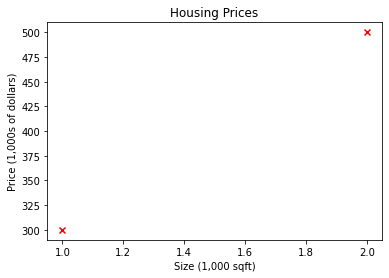

In [6]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Housing Prices')
plt.ylabel('Price (1,000s of dollars)')
plt.xlabel('Size (1,000 sqft)')
plt.show()

### Model function

In [8]:
def calculate_model_output(w, b, x):
    m = x.shape
    f_wb = np.zeros(m)
    
    for i in range(len(x)):
        f_wb[i] = w * x[i] + b
    
    return f_wb

In [12]:
w = 200
b = 100
print(f'w: {w}')
print(f'b: {b}')

w: 200
b: 100


### Plot data and model

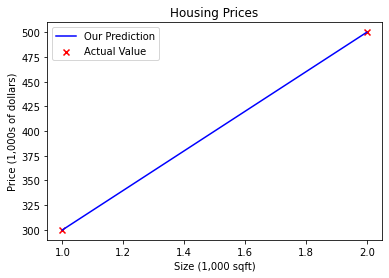

In [13]:
tmp_f_wb = calculate_model_output(w, b, x_train)

plt.plot(x_train,tmp_f_wb, c='b', label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Value')
plt.title('Housing Prices')
plt.ylabel('Price (1,000s of dollars)')
plt.xlabel('Size (1,000 sqft)')
plt.legend()
plt.show()

### Prediction

In [17]:
# Prediction
w = 200
b = 100
cost_1200sqft = w * 1.2 + b

print(f'${cost_1200sqft:.0f} thousand dollars')

$340 thousand dollars


## Cost function

#### Function to calculate the cost

In [23]:
def compute_cost(x, y, w, b):
    """
    Computes the cost for linear regression
    Args:
        x (ndarray): Shape (m,) variable such as house size
        y (ndarray): Shape (m,) target value
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
    Returns:
        total_cost (scalar): cost
    """

    m = len(x)
    cost = 0

    for i in range(m):
        
        # Calculate the model prediction
        f_wb = w * x[i] + b

        # Calculate cost
        cost = cost + (f_wb - y[i])**2

    total_cost = 1 / (2 * m) * cost

    return total_cost

In [67]:
J_hist = {}

for i in range(400):
    J_hist[i] = compute_cost(x_train,y_train,i,100)

In [49]:
f_wb = calculate_model_output(w, b, x_train)

#### Size - Prize graph

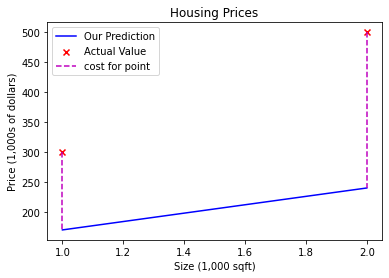

In [68]:
w = 70
b = 100
def size_price_graph(w):
    i_min = np.where(x_train == np.amin(x_train))[0][0]
    i_max = np.where(x_train == np.amax(x_train))[0][0]

    vert1 = {'x': [x_train[i_min],x_train[i_min]], 'y': [y_train[i_min],f_wb[i_min]]}
    vert2 = {'x': [x_train[i_max],x_train[i_max]], 'y': [y_train[i_max],f_wb[i_max]]}
    
    plt.plot(x_train,f_wb, c='b', label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Value')
    plt.plot(vert1['x'], vert1['y'], c='m', linestyle='dashed', label='cost for point')
    plt.plot(vert2['x'], vert2['y'], c='m', linestyle='dashed')

    plt.title('Housing Prices')
    plt.ylabel('Price (1,000s of dollars)')
    plt.xlabel('Size (1,000 sqft)')
    plt.legend()
    
    plt.show()
size_price_graph(w)

#### Cost - w graph

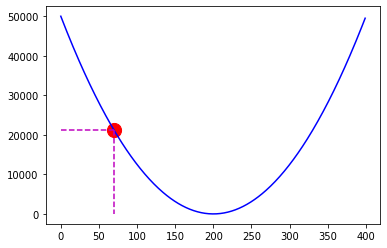

In [69]:
w = 70
def cost_w_graph(w):
    c = costs[w]

    vert = {'x': [w,w], 'y': [c,0]}
    hor = {'x': [0,w], 'y': [c,c]}

    plt.scatter(w, costs[w], c='r', s=200)
    plt.plot(costs.keys(),costs.values(), c='b', label='Prediction')
    plt.plot(hor['x'], hor['y'], c='m', linestyle='dashed')
    plt.plot(vert['x'], vert['y'], c='m', linestyle='dashed')

    plt.show()
cost_w_graph(w)

## Gradient Descent

In [70]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
 
    Args:
        x (ndarray): Shape (m,) variable such as house size
        y (ndarray): Shape (m,) target value
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t. the parameter w.
        dj_db (scalar): The gradient of the cost w.r.t. the parameter w.
    """
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        ## calculate prediction for this example
        f_wb_i  = w * x[i] + b
        ## calculate partial derivatives of cost for this example
        dj_dw_i = (f_wb_i - y[i]) * x[i]
        dj_db_i = f_wb_i - y[i]
        ## add to totals
        dj_dw   = dj_dw + dj_dw_i
        dj_db   = dj_db + dj_db_i
    
    # divide by number of examples
    dj_db = (1 / m) * dj_db
    dj_dw = (1 / m) * dj_dw

    return dj_db, dj_dw